# Project

#### Stefano Riato
#### Matricola ID: 894041
#### Ca' Foscari University of Venice
#### Project for Lab of Information Systems and Analytics
#### May 2024

# Summary of the Project Roadmap

1. **Load Dataset**
2. **Data Cleaning & Exploratory Data Analysis (EDA)** 
3. **Data Pre-processing**
4. **Feature Engineering**
5. **Models Training, Hyper-Tuning parameters and Evaluations**
7. **Conclusions**



# Load Dataset

In [1]:
# Importing libraries and setting options
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns               # To plot graphs
sns.set_style('whitegrid')          # To set the style of the graphs

# import all others

pd.options.display.max_columns = 90 # To display all the columns of the dataframe   

In [2]:
data_full = pd.read_csv('../datasets/bank/bank-full.csv', sep=';')


# Data Celaning & EDA (Exploratory Data Analysis)

## Data Cleaning

In this part we are going to:

- **Handling missing values**: I will identify columns with missing values and decide how to handle them, for example by deleting rows, filling with the mean or median, or using more advanced imputation methods.
- **Removing outliers**: I will use statistical methods to identify and remove outliers that could distort the analysis.
- **Coding of categorical variables**: I will transform the categorical variables into a format that can be used for analysis, for example using one-hot coding or label coding.
- **Data normalization**: If necessary, I will normalize the data to bring all variables to a common scale. 

In [3]:
# the shape of the dataset 
print('The dataset has {} rows and {} columns.'.format(data_full.shape[0], data_full.shape[1]))
print('\n')
# look at the first lines of the dataset
data_full.head()



The dataset has 45211 rows and 17 columns.




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# look at the last lines of the dataset
data_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Get information about the dataset (data types, number of non-null values, etc.)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset does not contain any NaN values. But we need to confirm that. So we use the code below:

In [6]:
# Check if there is some NaN values
if (data_full.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are no NaN values in the dataset.


We investigate the dataset with some statistics:

In [7]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


We can notice that pdays has a lot of -1 values. We need to investigate this column.
So we use the code below to check the number of -1 values in the pdays column:

In [8]:
# data cleaning -> check if there are too many -1 in the pdays column in order to drop them or the column
data_full['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

We can see that the column pdays has a lot of -1 values. This column is not useful for the prediction of the target variable y since it is not heterogeneous. So we can decide to drop it.

In [9]:
data_full = data_full.drop(['pdays'], axis=1)
data_full.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


# Exploratory Data Analysis (EDA)

- **Univariate analysis**: I will examine the distribution of each variable, for example using histograms or box plots.
- **Bivariate analysis**: I will examine relationships between pairs of variables, for example using scatter plots or calculating correlation coefficients.
- **Multivariate analysis**: I will examine relationships between multiple variables, for example using correlation matrices or dimensionality reduction techniques such as principal component analysis (PCA).

## Analyse our label

First, we analyse the variable to predict, which is the column y (if the client will subscribe a term deposit or not). We can see if the problem is balanced. This will affect how we evaluate the models.

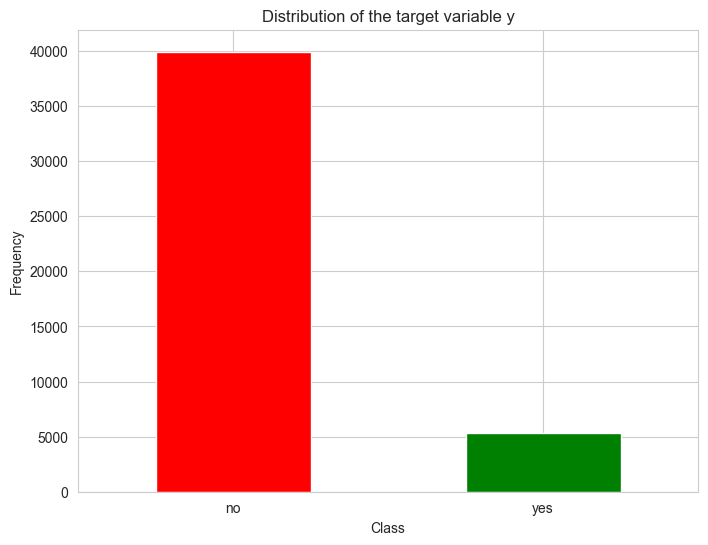

In [10]:
# frequency
y_counts = data_full['y'].value_counts()

# bar plt graph
plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of the target variable y')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


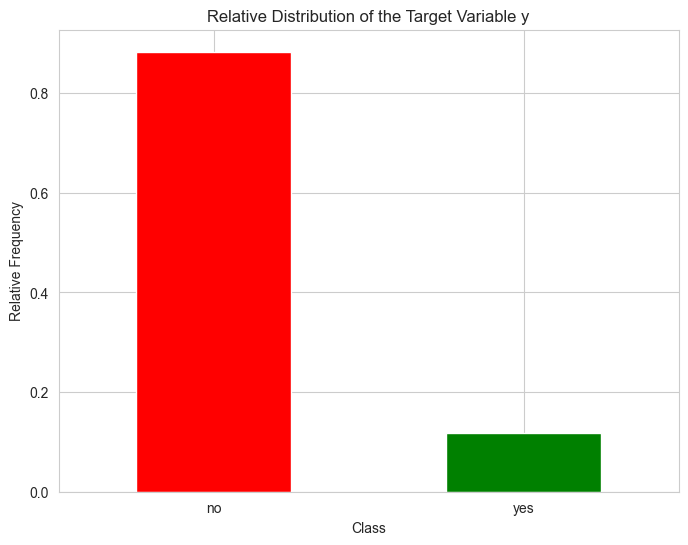

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [11]:
# Calculate the relative frequency of the target variable 'y'
y_relative_frequency = data_full['y'].value_counts(normalize=True)

# Plotting the relative frequency as a bar plot
plt.figure(figsize=(8, 6))
y_relative_frequency.plot(kind='bar', color=['red', 'green'])
plt.title('Relative Distribution of the Target Variable y')
plt.xlabel('Class')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

y_relative_frequency

We perfomed an univariate analysis of the target variable y (Graph 1). We can see that the dataset is unbalanced. The variable y has more or less *40.000* instances of the class 'no' and *5.000* instances of the class 'yes'. This is a problem because the model will be biased towards the class 'no' and it will not be able to predict the class 'yes' correctly.

From this graph we can see a relative frequency of *88.3%* of the class 'no' and only *11.7%* of the class 'yes'. So the dataset is imbalanced.



## Categorical Features

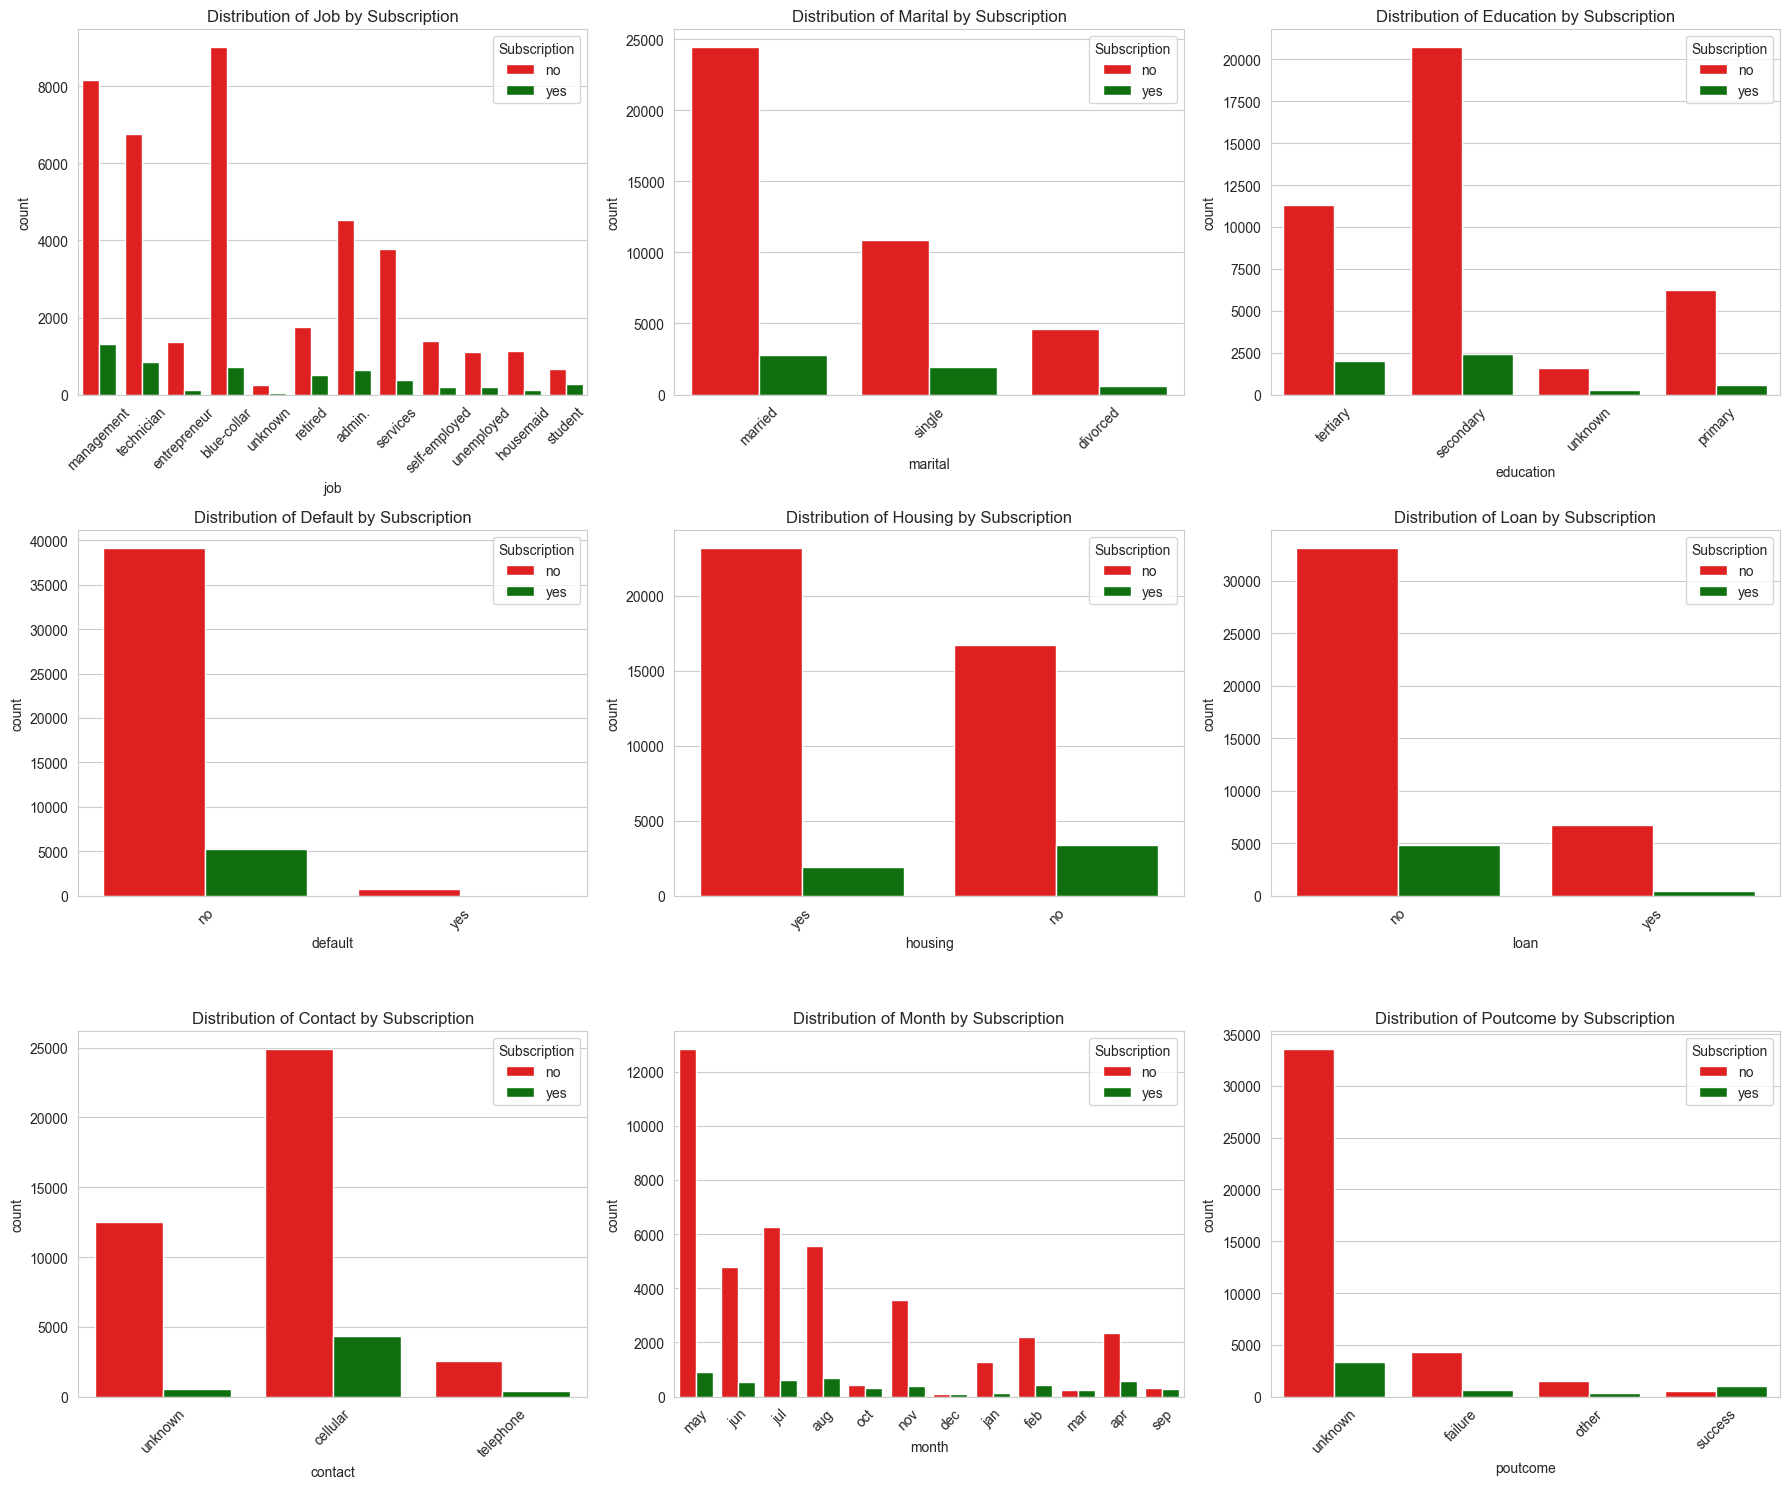

In [12]:
# Visualizing the distribution of categorical variables with respect to the target variable 'y'

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for i, var in enumerate(cat_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=data_full, x=var, hue='y', ax=axs[row, col], palette=['red', 'green'])
    axs[row, col].set_title(f'Distribution of {var.capitalize()} by Subscription')
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].legend(title='Subscription', loc='upper right')

fig.tight_layout()
plt.show()


 Here we can have a broader analysis among the categorical varible of the Dataset data_full. 

We need to analyse in deep for some **NaN**:

- poutcome -> missing values "unknown"
- contact -> missing values "unknown"
- educational -> missing values "unknown"
- job -> missing values "unknown"
Let's analyse in deep the two feature:

In [13]:
data_full['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [14]:
data_full = data_full.drop('poutcome', axis=1)


In [15]:
data_full['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [16]:
data_full = data_full.drop('contact', axis=1)

In [17]:
data_full['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [18]:
data_full['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In this moment we are in front of a scenario in which we need to deal with these 3 variables. We can be sure to drop **poutcome** and **contact**: in **poutcome** and **contact** there are many 'unknown" in relation of the total number of the rows (36.959 and 13020); we can instead drop the rows in **education** and **job**;

In [19]:
data_full = data_full[data_full['education'] != 'unknown']
data_full['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

In [20]:
data_full = data_full[data_full['job'] != 'unknown']
data_full['job'].value_counts()

job
blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: count, dtype: int64

## Numerical Features

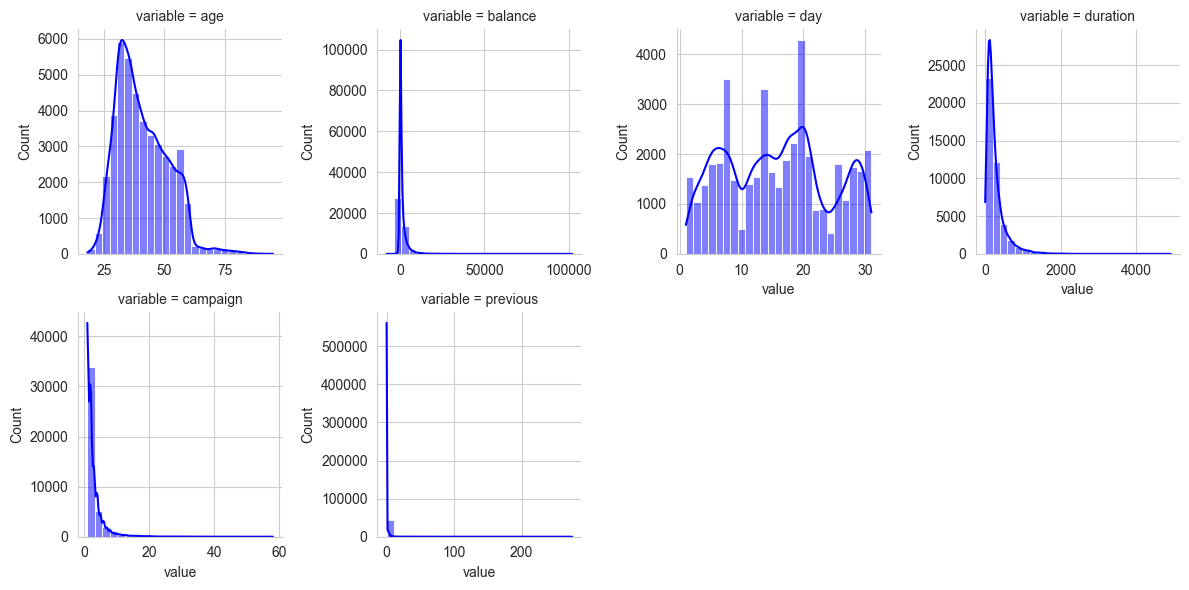

In [21]:
# Create a dataframe with only the numerical variables
data_num = data_full.select_dtypes(include=['int64', 'float64'])
# Melt the data into a long format so that I can plot the distribution of all numerical variables
pd.melt(data_full, value_vars=data_num.columns).groupby('variable').describe()

# Let's plot the distribution of all numerical variables
# Melt the data into a long format so that I can plot the distribution of all numerical variables
melt = pd.melt(data_full, value_vars=data_num.columns) 

# Wrap the columns to make it easier to read
g = sns.FacetGrid(melt, col="variable",  col_wrap=4, sharex=False, sharey=False) 

# Plot the distribution of each variable
g = g.map(sns.histplot, "value", bins=25, color="blue", kde=True)

There are some continuos features that need to be analysed in deep. Age and Day are more clear and we are able to understand the distributions. Duration instead is skewed to the left, because duration of the calls does not last too much time. 


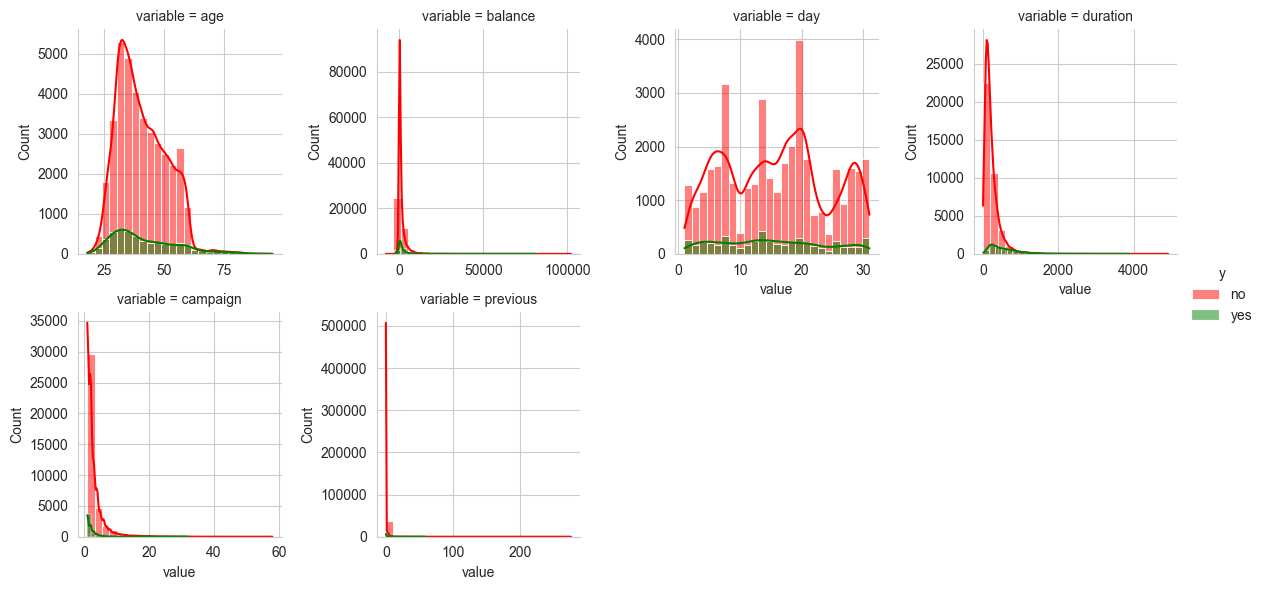

In [22]:
data_num = data_full.select_dtypes(include=['int64', 'float64'])

melt = pd.melt(data_full, id_vars='y', value_vars=data_num.columns)

g = sns.FacetGrid(melt, col="variable", hue="y", col_wrap=4, sharex=False, sharey=False, palette={'yes': 'green', 'no': 'red'})

g = g.map(sns.histplot, "value", bins=25, kde=True).add_legend()


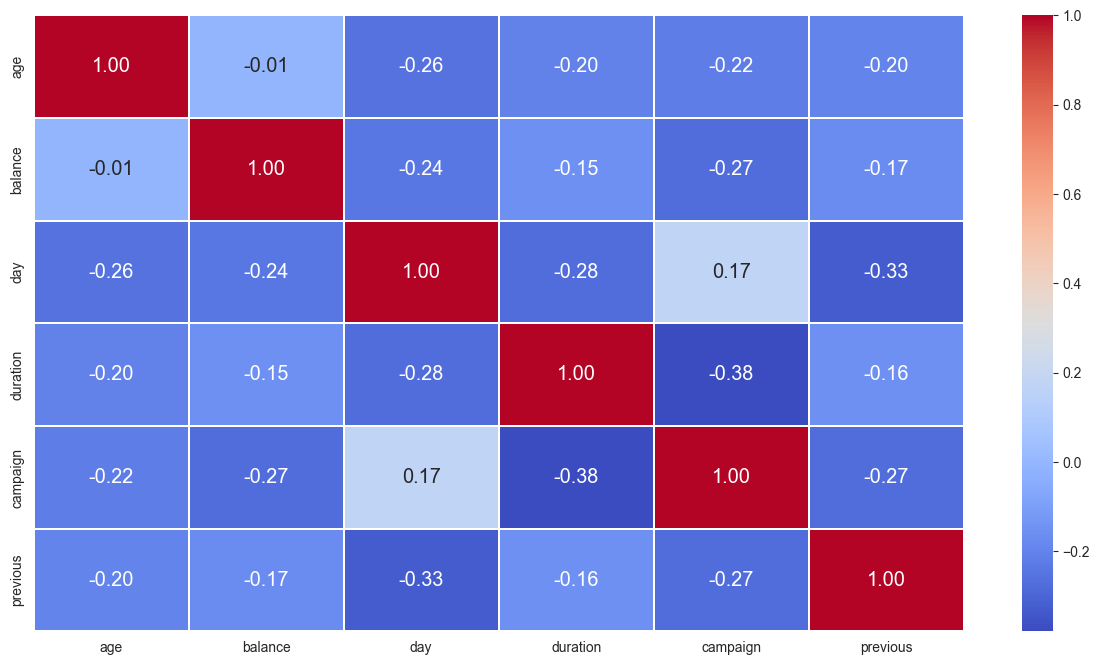

In [23]:
corr = data_full.select_dtypes(include=['int64', 'float64']).corr()

# Let's see the correlation between the numerical variables
# I will use the heatmap function from the seaborn library
# Select only numeric columns

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

In [24]:
data_full.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,0,no


# Pre-Processing Data

## Investigate the distribution of nominal features

We are going to check how many nominal, ordinal, continuous and discrete features there are in the dataset.

In [25]:
# Investigate the distribution of nominal features

# Count how many nominal, ordinal, continuous and discrete features there are in the dataset
nominal = 0
ordinal = 0
continuous = 0
discrete = 0
for col in data_full.columns:
    if data_full[col].dtype == 'object':
        #print(f'{col} is a nominal feature')
        nominal += 1
    elif data_full[col].dtype == 'int64':
        #print(f'{col} is a discrete feature')
        discrete += 1
    elif data_full[col].dtype == 'float64':
    
        continuous += 1
    else:
        ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 8 nominal features, 0 ordinal features, 0 continuous features and 6 discrete features.


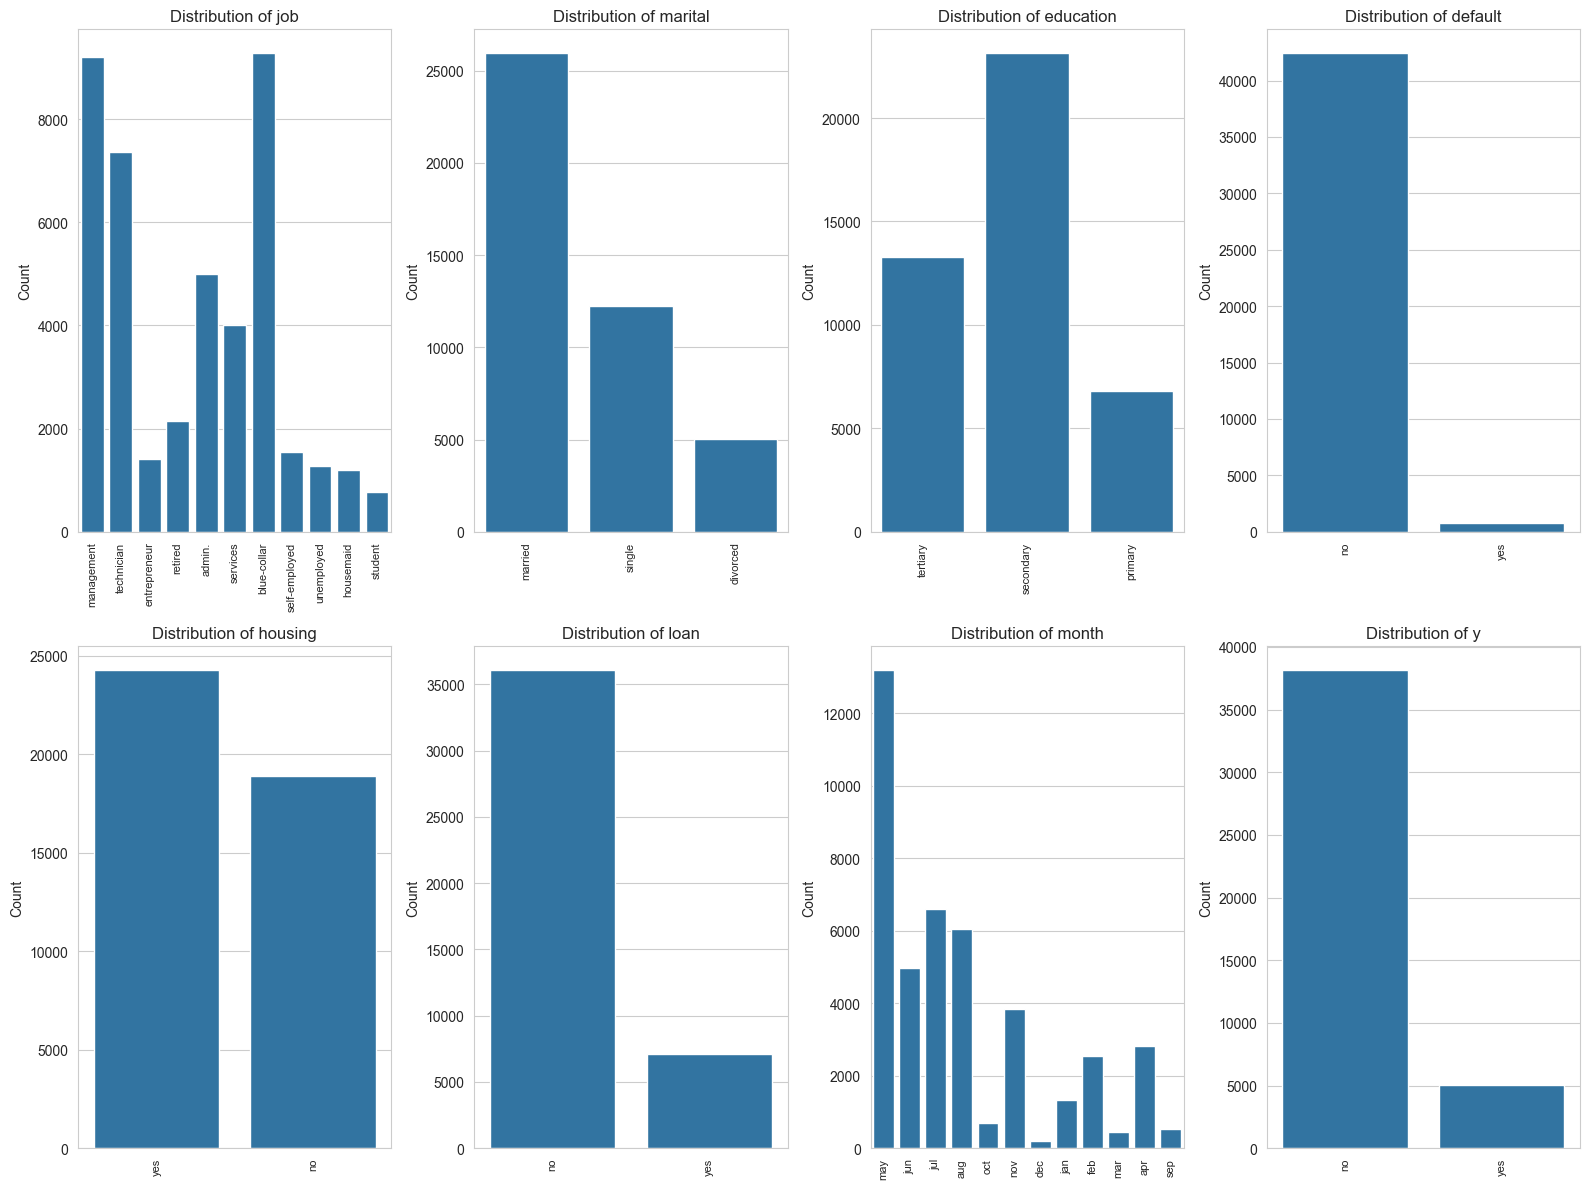

In [26]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# First of all, I need to select the norminal features
nominal_features = list(col for col in data_full.columns if data_full[col].dtype == 'object')

# Then, I can plot the distribution of each norminal feature in a subplot figure
n_cols = 4 
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# flatten the axes array to 1-d
axes = axes.ravel() 
for i, col in enumerate(nominal_features):
    sns.countplot(x=col, data=data_full, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}') 
    # smaller font for x-tick labels
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # remove the x-axis label and set the label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# if there are more subplots than features to plot, hide the empty subplots
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# adjust the subplot layout to fill the figure area
plt.tight_layout() 
plt.show()

We do not have any ordinal features. So we can use the one-hot encoding method to encode the nominal features.

## One-hot encoding


In [27]:
# Creating an empty list to store the nominal features
nominal_features = []

print('The nominal features are:')
for i in data_full.select_dtypes(include=['object']).columns:
    print('-', i)
    # Creating a list with the nominal features, to use it later
    nominal_features.append(i)

The nominal features are:
- job
- marital
- education
- default
- housing
- loan
- month
- y


In [28]:
df_dummy = data_full.copy()
df_dummy = pd.get_dummies(data_full, columns=nominal_features)

# Here, we'll assume 'y_yes' = 1 will represent the positive class
df_dummy['y'] = df_dummy['y_yes'].astype(int) # Convert the target variable to integer
df_dummy.drop(['y_no', 'y_yes'], axis=1, inplace=True) # Drop the original target variable columns

# Checking the shape of the dataframe
print('The shape of the dataframe is:', data_full.shape[0], 'rows and', data_full.shape[1], 'features.')
print('The shape of the dataframe with dummy variables is:', df_dummy.shape[0], 'rows and',
    df_dummy.shape[1], 'features.')

The shape of the dataframe is: 43193 rows and 14 features.
The shape of the dataframe with dummy variables is: 43193 rows and 42 features.


In [29]:
df_dummy.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0
5,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0
6,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,0


In [30]:
df_dummy.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'y'], dtype=object)

Again we check for high correlation...

In [31]:
df_dummy.corr().abs()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
age,1.000000,0.097602,0.008451,0.004953,0.004050,0.001099,0.057880,0.042242,0.021667,0.086781,0.022964,0.448375,0.006719,0.065432,0.185952,0.068533,0.002650,0.169244,0.280298,0.425297,0.209416,0.083096,0.075505,0.016245,0.016245,0.185152,0.185152,0.010029,0.010029,0.028633,0.073042,0.024109,0.000765,0.009950,0.004109,0.050075,0.019883,0.127566,0.035892,0.055538,0.033815,0.024760
balance,0.097602,1.000000,0.004118,0.020051,0.016251,0.016564,0.027842,0.046997,0.010010,0.001103,0.070703,0.049361,0.018706,0.040203,0.000699,0.017577,0.009611,0.022024,0.026283,0.012897,0.015179,0.070396,0.088099,0.066458,0.066458,0.067037,0.067037,0.084378,0.084378,0.015867,0.007511,0.018143,0.003990,0.024441,0.065628,0.028766,0.024492,0.069505,0.118163,0.040360,0.023990,0.051386
day,0.008451,0.004118,1.000000,0.030074,0.164982,0.052053,0.012093,0.024880,0.002479,0.004244,0.020047,0.008766,0.005239,0.010254,0.012185,0.032612,0.006593,0.000046,0.006203,0.006778,0.019570,0.006022,0.021963,0.008823,0.008823,0.029826,0.029826,0.010957,0.010957,0.046426,0.033277,0.010794,0.286270,0.248865,0.145538,0.196893,0.018450,0.023928,0.096852,0.029224,0.051192,0.030247
duration,0.004953,0.020051,0.030074,1.000000,0.083118,0.000295,0.016929,0.010174,0.001622,0.006758,0.008846,0.025637,0.007601,0.000740,0.004821,0.009373,0.019084,0.004496,0.022105,0.020835,0.003491,0.001790,0.000821,0.011040,0.011040,0.004017,0.004017,0.013230,0.013230,0.039880,0.040916,0.017819,0.009313,0.008205,0.015526,0.018621,0.003881,0.006583,0.005814,0.013415,0.014486,0.397393
campaign,0.004050,0.016251,0.164982,0.083118,1.000000,0.032381,0.022718,0.007794,0.002177,0.003915,0.019359,0.031106,0.006863,0.006533,0.020811,0.023050,0.020183,0.015694,0.030353,0.021829,0.010402,0.020793,0.014269,0.016441,0.016441,0.025554,0.025554,0.010447,0.010447,0.069344,0.155830,0.012982,0.030792,0.063450,0.101751,0.042806,0.019516,0.067918,0.085708,0.050935,0.037293,0.072465
previous,0.001099,0.016564,0.052053,0.000295,0.032381,1.000000,0.015129,0.016080,0.008221,0.016273,0.017489,0.005138,0.003088,0.010773,0.023757,0.000704,0.009334,0.004725,0.012440,0.016892,0.017279,0.008009,0.022304,0.017893,0.017893,0.036803,0.036803,0.011367,0.011367,0.053142,0.053493,0.036553,0.064401,0.047789,0.083460,0.058629,0.027134,0.003006,0.036712,0.053390,0.064058,0.091764
job_admin.,0.057880,0.027842,0.012093,0.016929,0.022718,0.015129,1.000000,0.189245,0.066491,0.061033,0.188439,0.082711,0.069571,0.115653,0.048907,0.163913,0.063077,0.033836,0.061687,0.042983,0.114875,0.223645,0.151109,0.011682,0.011682,0.042152,0.042152,0.031676,0.031676,0.020376,0.073845,0.000162,0.003936,0.006912,0.017270,0.002602,0.015099,0.025594,0.010104,0.012770,0.009458,0.007173
job_blue-collar,0.042242,0.046997,0.024880,0.010174,0.007794,0.016080,0.189245,1.000000,0.096117,0.088227,0.272402,0.119564,0.100570,0.167185,0.070698,0.236947,0.091182,0.064867,0.124166,0.088825,0.355592,0.045483,0.329947,0.009312,0.009312,0.173749,0.173749,0.017849,0.017849,0.027214,0.117832,0.025709,0.037213,0.034451,0.013461,0.023878,0.040748,0.163682,0.047186,0.042362,0.043074,0.070973
job_entrepreneur,0.021667,0.010010,0.002479,0.001622,0.002177,0.008221,0.066491,0.096117,1.000000,0.030998,0.095708,0.042008,0.035335,0.058740,0.024840,0.083251,0.032037,0.003553,0.043722,0.050072,0.013996,0.055787,0.071369,0.025841,0.025841,0.008518,0.008518,0.038230,0.038230,0.012190,0.044401,0.006779,0.000695,0.005343,0.024744,0.014810,0.016242,0.011296,0.052381,0.010949,0.006352,0.019513
job_housemaid,0.086

Let's take a look at the correlations among the features:


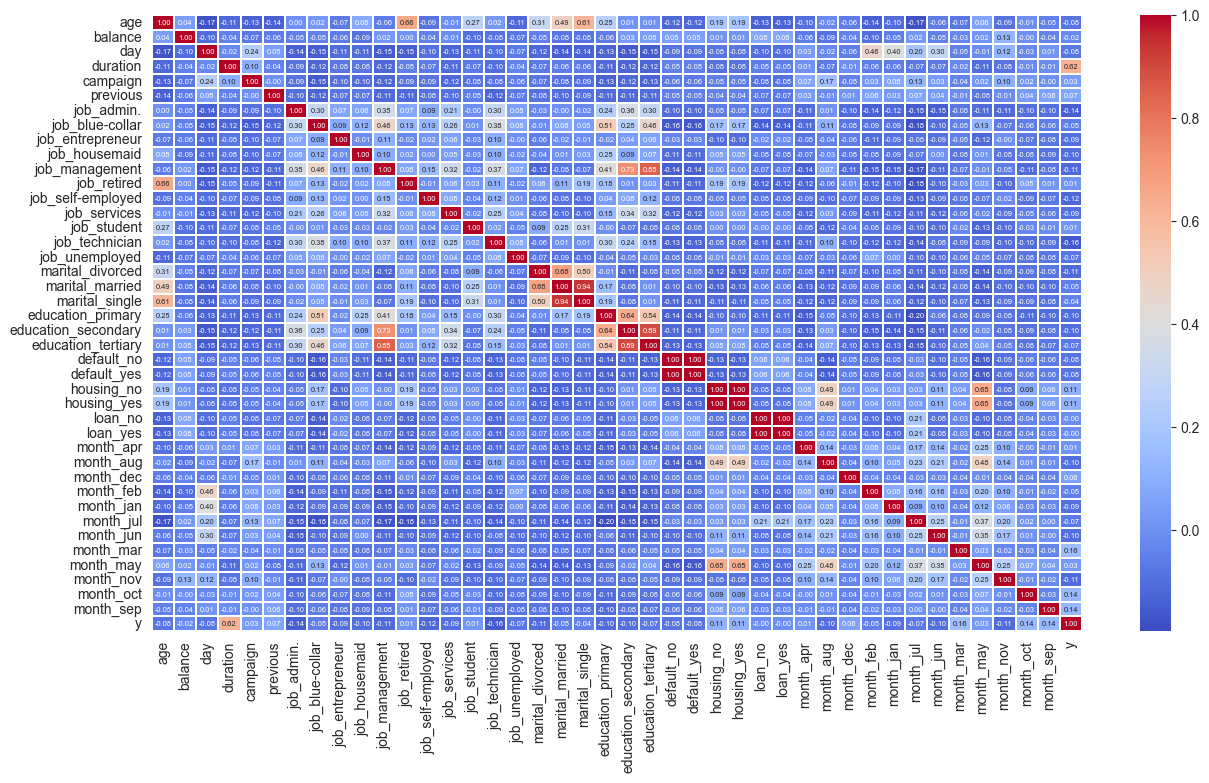

In [32]:
corr = df_dummy.corr().abs()

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

We need to extract the top 15 correlated pairs of features in order to drop them. I consider as benchmark 0.7 since it measures as a higher correlation.



In [33]:
corr = df_dummy.corr().abs()#df_dummy is the dataframe with the dummy variables
# we set the diagonal to zero
for i in range(len(corr)):
    corr.iloc[i,i] = 0  # we do not want to consider the self correlation among the variables


top_corr = corr.abs().unstack().sort_values(ascending=False)
top_corr = top_corr[top_corr > 0.70]
top_corr

loan_no              loan_yes               1.000000
loan_yes             loan_no                1.000000
housing_no           housing_yes            1.000000
housing_yes          housing_no             1.000000
default_no           default_yes            1.000000
default_yes          default_no             1.000000
marital_married      marital_single         0.770367
marital_single       marital_married        0.770367
education_secondary  education_tertiary     0.714750
education_tertiary   education_secondary    0.714750
dtype: float64

In [34]:
to_be_removed = [i[0] for i in top_corr.index]
to_be_removed = set(to_be_removed) #remove the pairs of features that are correlated
to_be_removed



{'default_no',
 'default_yes',
 'education_secondary',
 'education_tertiary',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'marital_married',
 'marital_single'}

In [35]:
#and drop one of them
df_dummy = df_dummy.drop(to_be_removed, axis=1)
df_dummy.head(5)

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,education_primary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0
5,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0
6,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


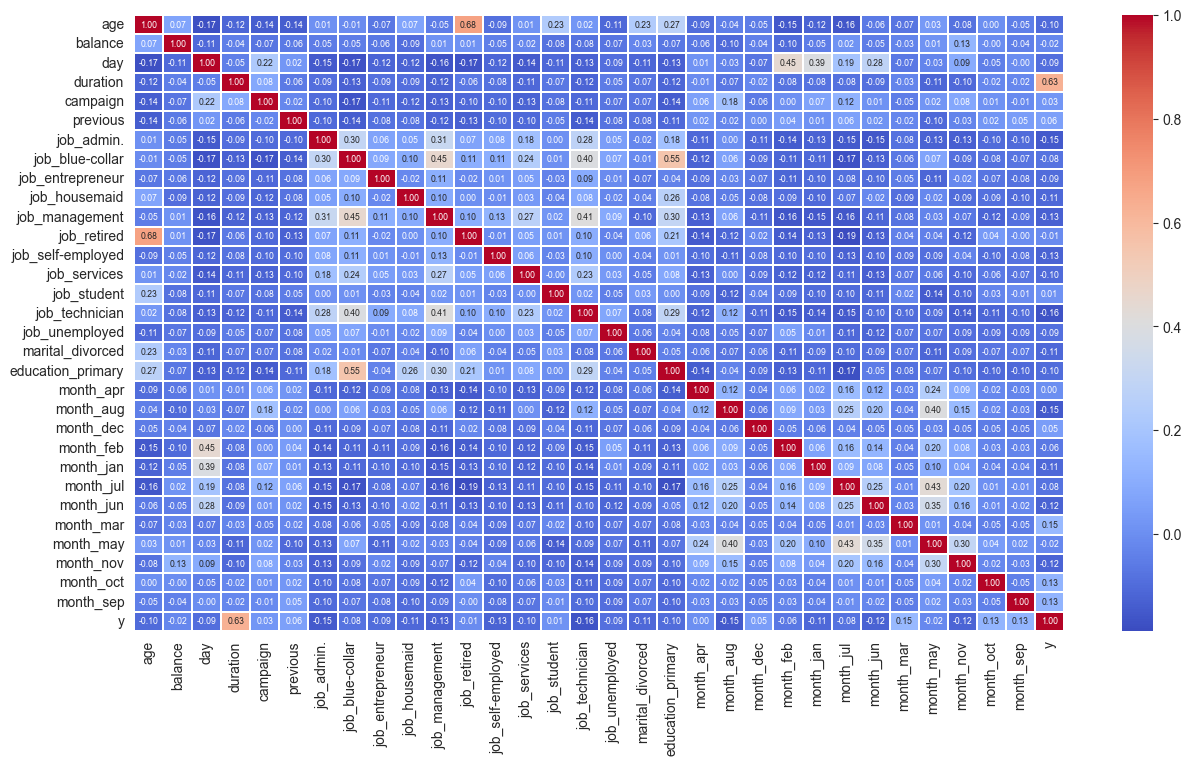

In [36]:
corr = df_dummy.corr().abs()

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

# Model Training

## Data Creation

It's now time to build our vectorial representation and create all the splits (train/validation/test)

Since the variable y is extracted as a slice of a DataFrame, it results in a 2D array (even if it's only one column).

To prevent a DataConversionwarning, we need to use this code:

In [37]:
X = df_dummy.drop(['y'], axis='columns')
y = df_dummy[['y']].values.ravel()

print('Shape of X: {}\n Shape of Y: {}'.format(X.shape, y.shape))


Shape of X: (43193, 31)
 Shape of Y: (43193,)


In [38]:
X

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,education_primary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
45207,71,1729,17,456,2,0,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
45208,72,5715,17,1127,5,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
45209,57,668,17,508,4,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [39]:
y

array([0, 0, 0, ..., 1, 0, 0])

### Feature Engineering

Before training the model, it is important to scale the data to avoid the dominance of the features with higher values.

Working with scaled data will also speed up the training process and will improve the performance of the model.

I will use StandardScaler of sklean to scale the data: this method will transform the data in such a way that the mean of the data will be 
0
 and the standard deviation will be 
1
, so as to have a normal distribution.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
X[['age', 'balance', 'day', 'duration', 'campaign', 'previous']] = scaler.fit_transform(X[['age', 'balance', 'day', 'duration', 'campaign', 'previous']])
X = pd.DataFrame(X, columns=X.columns)
X.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,education_primary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.639561,0.259354,-1.301418,0.010368,-0.573827,-0.25073,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0.307816,-0.435568,-1.301418,-0.415726,-0.573827,-0.25073,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,-0.738556,-0.444443,-1.301418,-0.706245,-0.573827,-0.25073,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,-0.548306,-0.369166,-1.301418,-0.462209,-0.573827,-0.25073,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,-1.214179,-0.298161,-1.301418,-0.160070,-0.573827,-0.25073,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


## Splitting dataset into Training set, Validation set and Test set

In [41]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y,
                                                          test_size=0.20, random_state=4)

# we select 0.25 of the training set as validation (i.e. 20% on the total dataset)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80,
                                                      test_size=0.20 , random_state=1)


We split the data in a way that we obtain a trainig set, validation set and test set.

In [42]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Training set size: 27643
Validation set size: 6911
Test set size: 8639


## Model Training and Model Selection

### KKN model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score # we use the F1 score since the dataset is unbalanced

knn = KNeighborsClassifier(n_neighbors=3,weights="uniform" )

knn.fit(X_train, y_train)

y_valid_p = knn.predict(X_valid)

# compute F1 SCORE on train and validation
train_err = f1_score(y_true=y_train, y_pred=knn.predict(X_train),average='macro') # 'macro' average per gestire il dataset sbilanciato
valid_err = f1_score(y_true=y_valid, y_pred=knn.predict(X_valid),average='macro')

accuracy_valid=accuracy_score(y_valid,y_valid_p)
f1_score_valid=f1_score(y_valid,y_valid_p)

print(f"Validation Accuracy:{accuracy_valid}")
print(f"Validation F1 score: {f1_score_valid}")

Validation Accuracy:0.886412964838663
Validation F1 score: 0.39661798616448884


#### Hyperparameter Tuning with Grid Search

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

# Define hyperparameters
n_neighbors = range(2, 40, 2) # Ranging neighbors from 5 to 50
weights_options = ['uniform', 'distance']

# Prepare data splits
# Make sure your X_train, X_valid, y_train, y_valid are properly defined and scaled if necessary

# Store errors

train_f1_errors = []
val_f1_errors = []
train_accuracy_scores = []
val_accuracy_scores = []

best_score = 0
# Explore hyperparameters
for n_neighbor in n_neighbors:
    for weight in weights_options:
        # initiali
        knn = KNeighborsClassifier(n_neighbors=n_neighbor,weights=weight)
        knn.fit(X_train, y_train)
        score = knn.score(X_valid, y_valid)
        if best_score < score:
            best_score = score
            par = {'n_neighbors': n_neighbor, 'weights':weight}
       
        # Compute Accuracy on train and validation
        train_acc = accuracy_score(y_true=y_train,y_pred=knn.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid,y_pred=knn.predict(X_valid))

        # Compute F1 score on train and validation
        train_f1 = f1_score(y_true=y_train,y_pred=knn.predict(X_train), average='macro')
        valid_f1 = f1_score(y_true=y_valid,y_pred=knn.predict(X_valid), average='macro')

        # Store the values in the lists
        train_f1_errors.append(train_f1)
        val_f1_errors.append(valid_f1)
        train_accuracy_scores.append(train_acc)
        val_accuracy_scores.append(valid_acc)

        print(f"Neighbors: {n_neighbor}, Weights: {weight} ->Validation F1: {valid_f1:.3f}, Validation Acc: {valid_acc:.3f}")
print(f'Best parameters: {par}')

Neighbors: 2, Weights: uniform ->Validation F1: 0.605, Validation Acc: 0.888
Neighbors: 2, Weights: distance ->Validation F1: 0.666, Validation Acc: 0.871
Neighbors: 4, Weights: uniform ->Validation F1: 0.596, Validation Acc: 0.885
Neighbors: 4, Weights: distance ->Validation F1: 0.660, Validation Acc: 0.884
Neighbors: 6, Weights: uniform ->Validation F1: 0.607, Validation Acc: 0.888
Neighbors: 6, Weights: distance ->Validation F1: 0.655, Validation Acc: 0.889
Neighbors: 8, Weights: uniform ->Validation F1: 0.609, Validation Acc: 0.889
Neighbors: 8, Weights: distance ->Validation F1: 0.630, Validation Acc: 0.885
Neighbors: 10, Weights: uniform ->Validation F1: 0.610, Validation Acc: 0.889
Neighbors: 10, Weights: distance ->Validation F1: 0.630, Validation Acc: 0.887
Neighbors: 12, Weights: uniform ->Validation F1: 0.610, Validation Acc: 0.891
Neighbors: 12, Weights: distance ->Validation F1: 0.630, Validation Acc: 0.889
Neighbors: 14, Weights: uniform ->Validation F1: 0.606, Validation

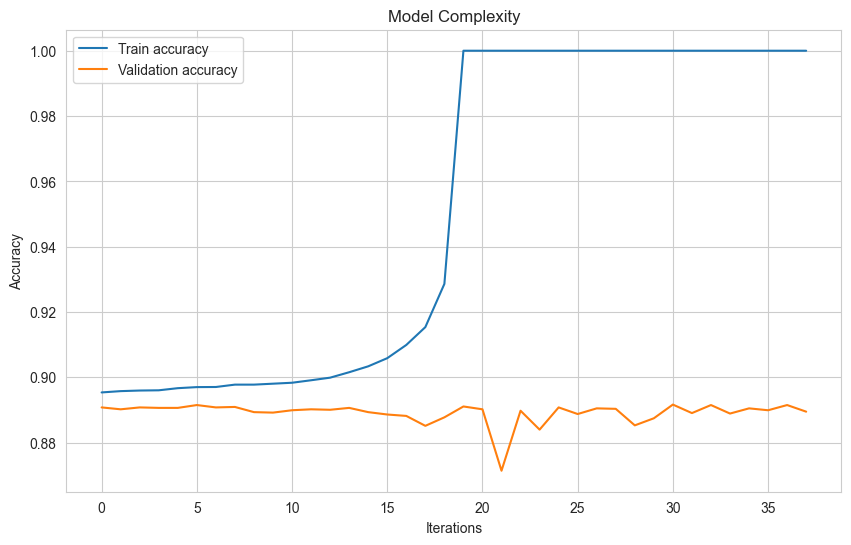

In [45]:
# Sorting indices by train errors for plotting
idxs = np.argsort(train_accuracy_scores) # Use train errors as a measure of model complexity

# Plot validation vs train errors at increasing model complexity
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_accuracy_scores)[idxs], label='Train accuracy')
plt.plot(np.array(val_accuracy_scores)[idxs], label='Validation accuracy')
plt.legend()
plt.title('Model Complexity')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##### Evaluation with the test set

In [46]:
print(par)
# initialize the model with the best parameters
knn = KNeighborsClassifier(**par)
# Fit the model with all data from the training set
knn.fit(X_train_80, y_train_80)
# Compute the test score
test_score_knn = knn.score(X_test, y_test)
# Compute the f1 score on the test set
test_f1_knn = f1_score(y_true=y_test, y_pred=knn.predict(X_test),average='macro')


print(f"Best score on validation set: {best_score}")
print(f"Test set score with best parameters: {test_score_knn}")
print(f'f1 score on test set: {test_f1_knn}')

{'n_neighbors': 26, 'weights': 'distance'}
Best score on validation set: 0.8916220518014759
Test set score with best parameters: 0.8945479800902882
f1 score on test set: 0.6287013142578576


### Gaussian Naive Bayes

#### Train and Test the model

--> il modello non ha bisogno di usare l'hyperparameter

In [47]:
from sklearn.naive_bayes import GaussianNB


#Build the model:
gbn = GaussianNB()

gbn.fit(X_train_80, y_train_80)
# Compute the test score
test_score_gbn = gbn.score(X_test, y_test)
# Compute the f1 score on the test set
test_f1_gbn = f1_score(y_true=y_test, y_pred=gbn.predict(X_test),average='macro')



print(f"Test set score with best parameters: {test_score_gbn}")
print(f'f1 score on test set: {test_f1_gbn}')

Test set score with best parameters: 0.8641046417409423
f1 score on test set: 0.6538388708541634


### Random Forest

We will begin to use a random forest




A Random Forest is a meta-estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is controlled with the *max_samples* parameter if *bootstrap* is set to True. If *bootstrap* is set to False, the whole dataset is used to build the tree.

The *n_estimators* parameter is the number of trees in the forest.






In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred = rf_classifier.predict(X_valid)

# Calculate metrics on the validation set
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
f1_score_valid = f1_score(y_valid, y_valid_pred)


print(f"Validation Accuracy: {accuracy_valid}")
print(f"Validation F1 Score: {f1_score_valid}")

Validation Accuracy: 0.9016061351468673
Validation F1 Score: 0.4720496894409938


 An F1 score of 48.1% is relatively low, especially in contrast to the high accuracy. This discrepancy typically indicates that the model might be performing well in predicting the majority class but poorly in predicting the minority class

 An accuracy of over 90% is generally considered very good in many contexts.

#### Analysis of the Random Forest

In [49]:
print(f'Importance of features: {rf_classifier.feature_importances_}')



Importance of features: [0.12383057 0.12640099 0.1151162  0.30592636 0.04636405 0.04817297
 0.0097486  0.0099259  0.00372756 0.00389894 0.01311195 0.00537779
 0.00535286 0.00707678 0.00700377 0.01075854 0.00544663 0.01191077
 0.00968555 0.01114211 0.01299195 0.00618037 0.0093511  0.00661376
 0.00864428 0.00970276 0.01797234 0.01198449 0.00874038 0.01633041
 0.01150925]


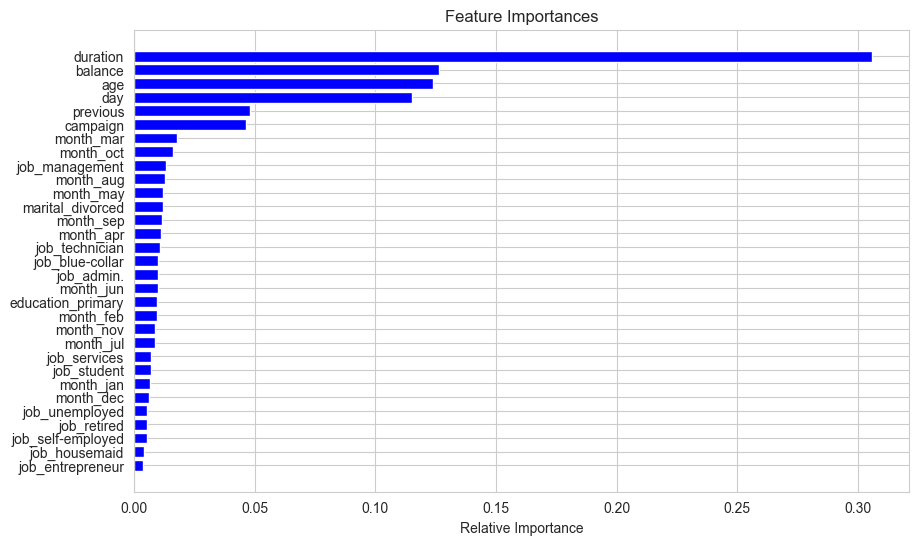

In [50]:
def plot_feature_importances(classifier):
    importances = classifier.feature_importances_
    features = X.columns
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="b", align="center")
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

plot_feature_importances(rf_classifier)

#### Hyperparameters tuning




n_estimators -> more trees will yields a more robust ensemble by reducing overfitting, but more trees needs more memory and time to train.
Instead max_fueatures will follow the rules of dumbs. 

##### Grid Search with training set and validation set

We are going to implement a grid search just as for loops over two parameters **n_estimators** and **max_depth**.

In [51]:
from sklearn.ensemble import RandomForestClassifier

val_accuracy = []
train_accuracy = []

n_trees = [100, 200, 300, 400, 500]
depths = range(3, 30, 3)


train_f1_errors = [] # we store the errors on the training set
val_f1_errors = [] # we store the errors on the validation set 
train_accuracy_scores = [] # we store the accuracy on the training set
val_accuracy_scores = [] # we store the accuracy on the validation set

best_score = 0
for depth in depths: 
    for trees in n_trees: # we try all the possible combinations
      rf = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=42) # we set the seed for reproducibility
      rf.fit(X_train, y_train) # we train the model
      # we evaluate the model with the validation set
      score = rf.score(X_valid, y_valid)
      if score > best_score: # if the model is better than the previous one, we store the model
        best_score = score
        best_parameters = {'n_estimators': trees, 'max_depth': depth} # we store the parameters of the model


      # Compute Accuracy on train and validation
      train_acc = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
      valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))


      # Compute F1 score on train and validation
      train_f1 = f1_score(y_true=y_train, y_pred=rf.predict(X_train), average='macro')
      valid_f1 = f1_score(y_true=y_valid, y_pred=rf.predict(X_valid), average='macro')



      # Store errors and scores
      train_f1_errors.append(train_f1)
      val_f1_errors.append(valid_f1)
      train_accuracy_scores.append(train_acc)
      val_accuracy_scores.append(valid_acc)
      
      print(f"Parameters: {(trees, depth)}, Train F1: {train_f1:.3f}, Validation F1: {valid_f1:.3f}, Train Acc:{train_acc:.3f}, Validation Acc: {valid_acc:.3f}")

print(f'Best Validation Accuracy: {best_score}')
print(f'Best parameters: {best_parameters}')

Parameters: (100, 3), Train F1: 0.469, Validation F1: 0.469, Train Acc:0.884, Validation Acc: 0.884
Parameters: (200, 3), Train F1: 0.469, Validation F1: 0.469, Train Acc:0.884, Validation Acc: 0.884
Parameters: (300, 3), Train F1: 0.469, Validation F1: 0.469, Train Acc:0.884, Validation Acc: 0.884
Parameters: (400, 3), Train F1: 0.469, Validation F1: 0.469, Train Acc:0.884, Validation Acc: 0.884
Parameters: (500, 3), Train F1: 0.469, Validation F1: 0.469, Train Acc:0.884, Validation Acc: 0.884
Parameters: (100, 6), Train F1: 0.497, Validation F1: 0.485, Train Acc:0.886, Validation Acc: 0.884
Parameters: (200, 6), Train F1: 0.495, Validation F1: 0.488, Train Acc:0.886, Validation Acc: 0.885
Parameters: (300, 6), Train F1: 0.496, Validation F1: 0.485, Train Acc:0.886, Validation Acc: 0.885
Parameters: (400, 6), Train F1: 0.494, Validation F1: 0.485, Train Acc:0.886, Validation Acc: 0.884
Parameters: (500, 6), Train F1: 0.494, Validation F1: 0.485, Train Acc:0.886, Validation Acc: 0.884


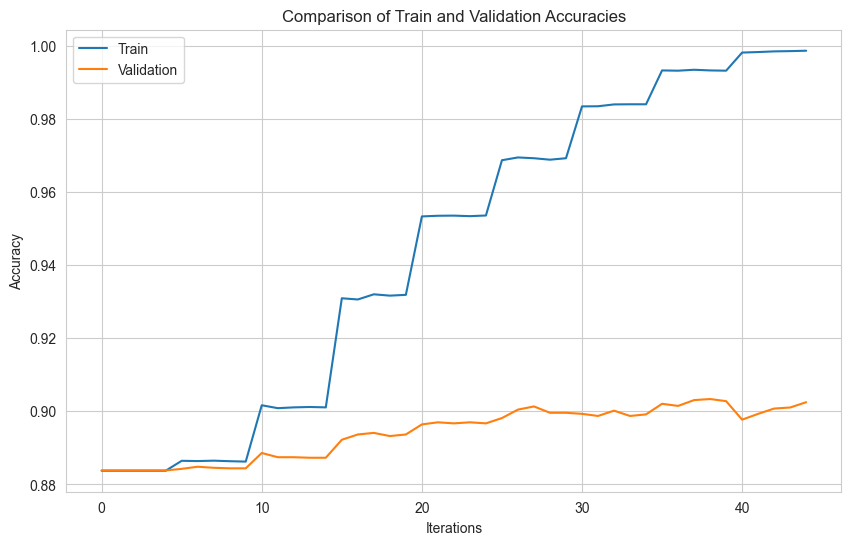

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_scores, label='Train Accuracy')
plt.plot(val_accuracy_scores, label='Validation Accuracy')
plt.legend(['Train', 'Validation'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Validation Accuracies')
plt.grid(True)
plt.show()

In [53]:
print(best_parameters)

# initialize the model with the best parameters
rf = RandomForestClassifier(**best_parameters, random_state=42)
# Fit the model with all data from the training set
rf.fit(X_train_80, y_train_80)
# Compute the test score
test_score = rf.score(X_test, y_test)
# Compute the f1 score on the test set
test_f1 = f1_score(y_true=y_test, y_pred=rf.predict(X_test),average='macro')


print(f"Best score on validation set: {best_score}")
print(f"Test set score with best parameters: {test_score}")
print(f'f1 score on test set: {test_f1}')

{'n_estimators': 400, 'max_depth': 24}
Best score on validation set: 0.9033424974678049
Test set score with best parameters: 0.9014932283829147
f1 score on test set: 0.7064281814353064


##### Analysing RandomForestClassifier with best parameters

Now we will use the *feature_importances_* attribute of the RandomForestClassifier to get the importance of the features.




In [54]:
print(f'Features importance:\n {rf.feature_importances_}')

Features importance:
 [0.12135551 0.12084919 0.11426478 0.31504139 0.04416717 0.05314256
 0.00913598 0.00924142 0.00374375 0.00378822 0.01170723 0.00599092
 0.00507562 0.00673399 0.00673283 0.01010222 0.00531952 0.01139812
 0.00975943 0.01145512 0.01169889 0.00682049 0.00943227 0.00659244
 0.0086756  0.0095753  0.01799478 0.0121313  0.00881969 0.01602412
 0.01323012]


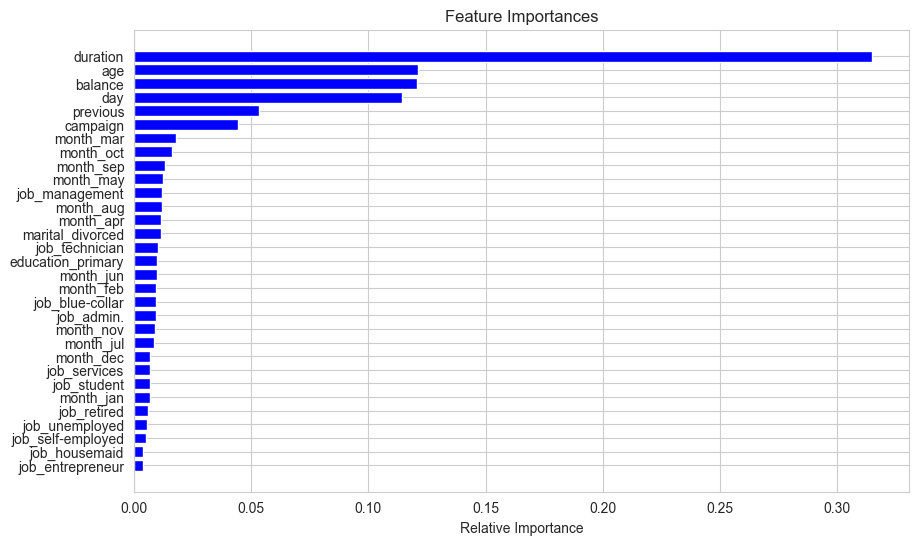

In [55]:
plot_feature_importances(rf)



# Conclusion

We need to compare all the three models

In [56]:
table = pd.DataFrame({'Model': ['KNN', 'Random Forest', 'Gaussian Naive Bayes'],
                      'Test Set scores':[test_score_knn, test_score, test_score_gbn],
                      'F1 score': [test_f1_knn, test_f1, test_f1_gbn]}) # test set scores and f1 scores

table

,Model,Test Set scores,F1 score
0,KNN,0.894548,0.628701
1,Random Forest,0.901493,0.706428
2,Gaussian Naive Bayes,0.864105,0.653839


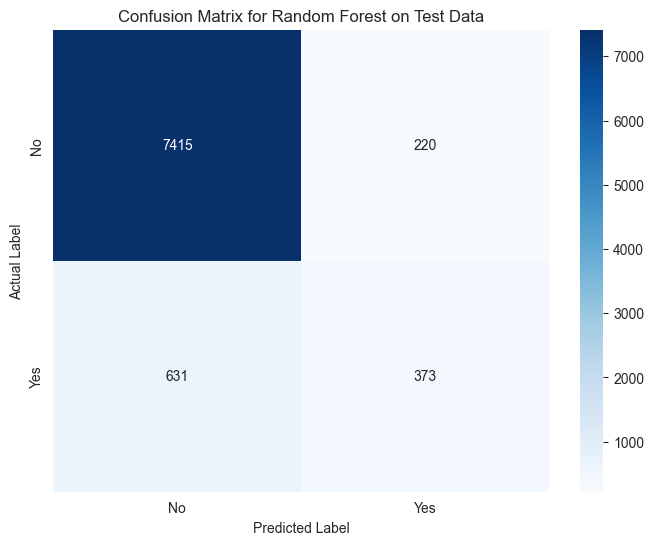

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best model to predict on test set
y_pred_test_log = rf.predict(X_test)

# Generate the confusion matrix
cm_test_log = confusion_matrix(y_test, y_pred_test_log)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_log, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Random Forest on Test Data")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
